In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from collections import OrderedDict
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist

In [22]:
from pandas.plotting import scatter_matrix

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [84]:
import math

In [118]:
from sklearn.utils import shuffle

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Raw Data

In [ ]:
raw_df = pd.read_csv('./data/twitter_user_data.csv', encoding = "ISO-8859-1")
raw_df

In [ ]:
raw_df.info()

16306/20050 (~81.3%) accounts has a description  

In [3]:
# raw_df.drop_duplicates()
# raw_df

No duplicated row

In [74]:
len(raw_df['_unit_id'].unique())

20050

In [5]:
raw_df.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


## 11/09/23 exploration

In [7]:
raw_df['_golden'].value_counts()

False    20000
True        50
Name: _golden, dtype: int64

Only 50 users were included in the gold standard for the model

In [9]:
raw_df['_unit_state'].value_counts()

finalized    20000
golden          50
Name: _unit_state, dtype: int64

In [11]:
# test = lambda x, y: 1 if not x and y=='finalized' or x and y=='golden' else 0

In [13]:
# raw_df['golden_to_unit_state'] = raw_df.apply(lambda x: test(x._golden, x._unit_state), axis=1)

In [14]:
# raw_df['golden_to_unit_state'].value_counts()

1    20050
Name: golden_to_unit_state, dtype: int64

In [15]:
# raw_df = raw_df.drop(['golden_to_unit_state'], axis=1)

Column `_golden` and column `_unit_state` 100% proportionally correlated

In [16]:
raw_df['_trusted_judgments'].value_counts()

3      20000
259        4
245        4
249        4
264        4
260        3
242        3
227        2
235        2
247        2
262        1
273        1
248        1
240        1
212        1
252        1
253        1
271        1
237        1
270        1
239        1
246        1
256        1
274        1
231        1
254        1
261        1
255        1
233        1
228        1
258        1
250        1
Name: _trusted_judgments, dtype: int64

20000 non-golden users get 3, other 50 get different numbers

In [21]:
raw_df['_last_judgment_at'].value_counts()

10/26/15 23:05    217
10/26/15 23:07    205
10/26/15 23:31    182
10/26/15 23:57    181
10/27/15 1:43     169
                 ... 
10/27/15 2:29       2
10/27/15 2:21       1
10/27/15 2:48       1
10/27/15 2:17       1
10/27/15 2:18       1
Name: _last_judgment_at, Length: 283, dtype: int64

In [23]:
raw_df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [24]:
raw_df['gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20050 entries, 0 to 20049
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
19953 non-null  object
dtypes: object(1)
memory usage: 156.8+ KB


5 categories for column `gender`: male, female, brand, unknown, NULL

In [28]:
raw_df['gender:confidence'].value_counts().to_dict()

{1.0: 13926,
 0.0: 71,
 0.6691: 31,
 0.6709: 30,
 0.6591: 30,
 0.6667: 30,
 0.6619: 29,
 0.6743: 27,
 0.6686: 27,
 0.6769: 26,
 0.6666: 25,
 0.6678: 24,
 0.6561: 24,
 0.6642: 24,
 0.6715: 24,
 0.6707: 24,
 0.6656: 24,
 0.6752: 24,
 0.6609: 23,
 0.6675: 23,
 0.6685: 22,
 0.6774: 22,
 0.6711: 22,
 0.6645: 22,
 0.6766: 22,
 0.6741: 22,
 0.6674: 21,
 0.6739: 21,
 0.6706: 21,
 0.6659: 21,
 0.6617: 21,
 0.6664: 21,
 0.6796: 20,
 0.6653: 20,
 0.6705: 20,
 0.6587: 20,
 0.6787: 20,
 0.6641: 20,
 0.6866: 20,
 0.6628: 20,
 0.6702: 20,
 0.6742: 20,
 0.6708: 20,
 0.6688: 20,
 0.6611: 19,
 0.6692: 19,
 0.667: 19,
 0.6848: 19,
 0.6698: 19,
 0.6626: 19,
 0.6745: 19,
 0.6634: 19,
 0.6736: 19,
 0.6727: 18,
 0.675: 18,
 0.6801: 18,
 0.6672: 18,
 0.6509: 18,
 0.6655: 18,
 0.6602: 18,
 0.6722: 18,
 0.6723: 18,
 0.6648: 18,
 0.6755: 18,
 0.6734: 17,
 0.6735: 17,
 0.6757: 17,
 0.6684: 17,
 0.6772: 17,
 0.6636: 17,
 0.6829: 17,
 0.6713: 17,
 0.6763: 17,
 0.6638: 17,
 0.6623: 16,
 0.6633: 16,
 0.6818: 16,
 0.6

In [29]:
from collections import OrderedDict

In [30]:
OrderedDict(sorted(raw_df['gender:confidence'].value_counts().to_dict().items()))

OrderedDict([(0.0, 71),
             (0.314, 1),
             (0.3206, 1),
             (0.3223, 2),
             (0.3268, 1),
             (0.3269, 1),
             (0.3272, 1),
             (0.3275, 2),
             (0.3276, 1),
             (0.3282, 1),
             (0.3283, 1),
             (0.3286, 1),
             (0.3303, 1),
             (0.3307, 1),
             (0.3311, 1),
             (0.3312, 1),
             (0.3319, 1),
             (0.332, 1),
             (0.3321, 1),
             (0.3322, 1),
             (0.3327, 1),
             (0.333, 1),
             (0.3333, 1),
             (0.3334, 1),
             (0.3335, 1),
             (0.3337, 1),
             (0.3339, 1),
             (0.334, 3),
             (0.3343, 1),
             (0.3347, 1),
             (0.3348, 2),
             (0.3349, 1),
             (0.335, 5),
             (0.3351, 2),
             (0.3352, 2),
             (0.3353, 3),
             (0.3354, 5),
             (0.3355, 2),
             (0.335

13926/20050 (~69.5%) guesses with 100% confidence

In [32]:
raw_df['profile_yn'].value_counts()

yes    19953
no        97
Name: profile_yn, dtype: int64

97 accounts not available at judging time

In [33]:
OrderedDict(sorted(raw_df['profile_yn:confidence'].value_counts().to_dict().items()))

OrderedDict([(0.6272, 1),
             (0.6308, 1),
             (0.631, 1),
             (0.6323, 1),
             (0.6361, 1),
             (0.6362, 1),
             (0.6373, 1),
             (0.6377, 1),
             (0.6403, 1),
             (0.6404, 1),
             (0.6406, 1),
             (0.6408, 1),
             (0.641, 1),
             (0.6418, 1),
             (0.6424, 1),
             (0.6426, 1),
             (0.643, 1),
             (0.6432, 1),
             (0.6434, 1),
             (0.6436, 4),
             (0.644, 2),
             (0.6442, 1),
             (0.6444, 1),
             (0.6445, 1),
             (0.6452, 1),
             (0.6456, 1),
             (0.646, 1),
             (0.6461, 1),
             (0.6462, 1),
             (0.6464, 1),
             (0.6466, 1),
             (0.6467, 1),
             (0.647, 1),
             (0.6471, 1),
             (0.6475, 1),
             (0.6476, 1),
             (0.6477, 1),
             (0.6478, 2),
             (0.64

No account was guess with the confidence less than 60%  
19642/20050 (~98%) guesses with 100% confidence

In [34]:
19642/20050

0.9796508728179552

In [37]:
raw_df['gender_gold'].value_counts()

male               19
female             14
brand              13
unknown             2
female\nunknown     1
male\nunknown       1
Name: gender_gold, dtype: int64

In [38]:
raw_df['profile_yn_gold'].value_counts()

yes    50
Name: profile_yn_gold, dtype: int64

100% golden accounts were available at judging time

In [39]:
raw_df['tweet_coord'].value_counts()

[37.7463, -25.6668]            2
[52.2297, 21.0122]             2
[30.764, 20.2236]              2
[25.2803, 51.5225]             2
[53.33422016, -2.74855379]     2
                              ..
[45.53106791, -122.6503049]    1
[33.4931, -111.926]            1
[43.0621, 141.354]             1
[42.93237349, -70.88862593]    1
[32.725409, -97.3208496]       1
Name: tweet_coord, Length: 146, dtype: int64

In [41]:
raw_df['tweet_coord'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20050 entries, 0 to 20049
Series name: tweet_coord
Non-Null Count  Dtype 
--------------  ----- 
159 non-null    object
dtypes: object(1)
memory usage: 156.8+ KB


159 accounts have location turned on

In [42]:
raw_df['tweet_count'].value_counts()

151386     30
1          26
3          24
2372591    24
2          21
           ..
20977       1
27483       1
12728       1
8563        1
17851       1
Name: tweet_count, Length: 14280, dtype: int64

In [43]:
raw_df['user_timezone'].value_counts()

Eastern Time (US & Canada)        2496
Pacific Time (US & Canada)        2106
Central Time (US & Canada)        1505
London                            1307
Atlantic Time (Canada)             589
                                  ... 
America/Boise                        1
Ulaan Bataar                         1
Europe/Moscow                        1
GMT+3                                1
America/Argentina/Buenos_Aires       1
Name: user_timezone, Length: 156, dtype: int64

In [44]:
raw_df['user_timezone'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20050 entries, 0 to 20049
Series name: user_timezone
Non-Null Count  Dtype 
--------------  ----- 
12252 non-null  object
dtypes: object(1)
memory usage: 156.8+ KB


12252/20050 (~61%) accounts has timezone information

## 13/09/23 exploration

In [8]:
raw_df['description'].head(20).to_list()

['i sing my own rhythm.',
 "I'm the author of novels filled with family drama and romance.",
 'louis whining and squealing and all',
 'Mobile guy.  49ers, Shazam, Google, Kleiner Perkins, Yahoo!, Sprint PCS, AirTouch, Air Force.  Stanford GSB, UVa.  Dad, Husband, Brother.  Golfer.',
 'Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx',
 "you don't know me.",
 'A global marketplace for images, videos and music. Sharing photos, inspiration, design tips & videos for the creative community.',
 'The secret of getting ahead is getting started.',
 'Pll Fan // Crazy about MCD // Ramen is bae',
 'Renaissance art historian, University of Nottingham; fuelled by Haribo, partial to coffee and with a soft spot for Renaissance China. National Teaching Fellow.',
 'Clean food that tastes great while providing energy & nutrients! No guilt granola, vegan/paleo friendly options too! Cert organic,

In [9]:
raw_df['created'].head(20).to_list()

['12/5/13 1:48',
 '10/1/12 13:51',
 '11/28/14 11:30',
 '6/11/09 22:39',
 '4/16/14 13:23',
 '3/11/10 18:14',
 '4/24/08 13:03',
 '12/3/12 21:54',
 '9/8/15 4:50',
 '5/13/11 3:32',
 '11/16/11 17:14',
 '2/22/15 20:06',
 '8/10/12 5:05',
 '5/1/12 22:14',
 '4/6/13 15:31',
 '10/3/15 21:32',
 '8/27/11 9:42',
 '10/18/09 11:41',
 '7/20/15 12:01',
 '1/30/15 9:52']

In [10]:
raw_df['link_color'].head(20).to_list()

['08C2C2',
 '0084B4',
 'ABB8C2',
 '0084B4',
 '3B94D9',
 'F5ABB5',
 '298AAE',
 '0000FF',
 '9266CC',
 '9266CC',
 '0084B4',
 '0084B4',
 '0084B4',
 '2FC2EF',
 '0084B4',
 '0084B4',
 '58185',
 '0084B4',
 '0084B4',
 '0084B4']

In [16]:
raw_df['sidebar_color'].value_counts()

sidebar_color
C0DEED    9093
0         4037
FFFFFF    3797
EEEEEE     699
181A1E     304
          ... 
0084B4       1
870000       1
3E0405       1
656869       1
B68B9E       1
Name: count, Length: 561, dtype: int64

In [13]:
raw_df['name'].head(20).to_list()

['sheezy0',
 'DavdBurnett',
 'lwtprettylaugh',
 'douggarland',
 'WilfordGemma',
 'monroevicious',
 'Shutterstock',
 'RobinMeske',
 'pigzilla_',
 'GabrieleNeher',
 'Blissful_Eats',
 'eliseotecleo',
 'kaylanabrewer_',
 'americacredit',
 'cheyflan',
 'Ayu7sith4',
 'Toucaan_Samm',
 'SSmyth2010',
 'DarkToonsGaming',
 'GourlayLynn']

In [14]:
raw_df['profileimage'].head(20).to_list()

['https://pbs.twimg.com/profile_images/414342229096808449/fYvzqXN7_normal.png',
 'https://pbs.twimg.com/profile_images/539604221532700673/WW16tBbU_normal.jpeg',
 'https://pbs.twimg.com/profile_images/657330418249658368/SBLCXdF7_normal.png',
 'https://pbs.twimg.com/profile_images/259703936/IMG_8444_normal.JPG',
 'https://pbs.twimg.com/profile_images/564094871032446976/AOfpk-mr_normal.jpeg',
 'https://pbs.twimg.com/profile_images/656336865033850880/ougQS3q7_normal.jpg',
 'https://pbs.twimg.com/profile_images/528547133025042432/RC9k-6fp_normal.png',
 'https://pbs.twimg.com/profile_images/508875440107180032/apOHVAt8_normal.jpeg',
 'https://pbs.twimg.com/profile_images/658670112304709632/ZhhUs4WC_normal.jpg',
 'https://pbs.twimg.com/profile_images/513327289858535424/vrc79hs1_normal.jpeg',
 'https://pbs.twimg.com/profile_images/653518467258257408/Gv6tlJfg_normal.jpg',
 'https://pbs.twimg.com/profile_images/569710046712299520/TFSOX_An_normal.jpeg',
 'https://pbs.twimg.com/profile_images/65122

In [17]:
raw_df['text'].head(20).to_list()

['Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ',
 '\x89ÛÏIt felt like they were my friends and I was living the story with them\x89Û\x9d https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz',
 'i absolutely adore when louis starts the songs it hits me hard but it feels good',
 "Hi @JordanSpieth - Looking at the url - do you use @IFTTT?!  Don't typically see an advanced user on the @PGATOUR! https://t.co/H68ou5PE9L",
 'Watching Neighbours on Sky+ catching up with the Neighbs!! Xxx _Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_Ù\x8fÈ_ÙÔ\x8d_Ù\x8fÈ Xxx',
 'Ive seen people on the train with lamps, chairs, tvs etc  https://t.co/w6zf4pVM4I',
 '@BpackEngineer Thank you for your patience while we take care of the issue!',
 "Gala Bingo clubs bought for å£241m: The UK's largest High Street bingo operator, Gala, is being taken over by\x89Û_ https://t.co/HzeeykJUd3",
 '@_Aphmau_ the pic defines all mcd fangirls/fanboys and mcd shippers xD',
 '@Evielady

In [18]:
raw_df['tweet_coord'].head(20).to_list()

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [19]:
raw_df['tweet_location'].head(20).to_list()

['main; @Kan1shk3',
 nan,
 'clcncl',
 'Palo Alto, CA',
 nan,
 'New York Gritty',
 'Worldwide',
 nan,
 nan,
 'Nottingham, England.',
 'New York',
 nan,
 nan,
 'America Credit',
 'row b seat 104',
 nan,
 nan,
 'Glasgow',
 nan,
 nan]

### Check golden standard data

In [31]:
golden_rdf = raw_df[raw_df['_golden'] == True]
golden_rdf

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20000,815746503,True,golden,249,NaN,male,0.9612,yes,0.9612,8/5/10 8:31,...,https://pbs.twimg.com/profile_images/643511925...,0,FFFFFF,Reimagining the #webdesign process by @InVisio...,NaN,3874,10/26/15 12:40,6.587300e+17,127.0.0.1,Athens
20001,815750089,True,golden,271,NaN,brand,0.9622,yes,1.0000,9/10/14 16:30,...,https://pbs.twimg.com/profile_images/509901605...,0,0,#WestHam Tweets: 52: Goal. @FulhamFC double th...,NaN,24827,10/26/15 13:20,6.587400e+17,NaN,NaN
20002,815750297,True,golden,245,NaN,brand,1.0000,yes,1.0000,5/11/09 15:31,...,https://pbs.twimg.com/profile_images/532477863...,1,FFFFFF,Webber: 'It's a chance for the lads to pit the...,NaN,42075,10/26/15 12:40,6.587300e+17,"Wembley Stadium, London",London
20003,815750417,True,golden,245,NaN,brand,0.6408,yes,1.0000,8/1/14 13:20,...,https://abs.twimg.com/sticky/default_profile_i...,0,C0DEED,Get Weather Updates from The Weather Channel. ...,NaN,63240,10/26/15 12:40,6.587300e+17,NaN,NaN
20004,815750696,True,golden,261,NaN,male,1.0000,yes,1.0000,3/26/12 14:40,...,https://pbs.twimg.com/profile_images/604379716...,0,0,@TheFalcoholic is like the mailman... Because ...,NaN,3296,10/26/15 12:40,6.587300e+17,Parts Unknown,Pacific Time (US & Canada)
20005,815751197,True,golden,247,NaN,male,0.7538,yes,1.0000,9/7/12 19:57,...,https://pbs.twimg.com/profile_images/258765879...,0,C0DEED,@johnroderick @danbenjamin The way of the future.,NaN,2579,10/26/15 12:40,6.587300e+17,The skies,Central Time (US & Canada)
20006,815751353,True,golden,242,NaN,female,0.8503,yes,1.0000,2/12/12 5:49,...,https://pbs.twimg.com/profile_images/612682953...,0,C0DEED,@Stickyribs1 Great burgers and ribs tonight. N...,NaN,710,10/26/15 13:19,6.587400e+17,NaN,NaN
20007,815752261,True,golden,249,NaN,female,1.0000,yes,1.0000,11/15/11 8:04,...,https://pbs.twimg.com/profile_images/658240828...,0,0,its for the best i hate 2/4 people in this hou...,NaN,17230,10/26/15 12:39,6.587300e+17,NaN,Amsterdam
20008,815752556,True,golden,256,NaN,male,0.8458,yes,1.0000,12/17/09 16:54,...,https://pbs.twimg.com/profile_images/244887748...,0,C0DEED,"@anarchoshow breaking the laws of physics, whi...",NaN,11318,10/26/15 12:40,6.587300e+17,NaN,NaN
20009,815752702,True,golden,262,NaN,female,1.0000,yes,1.0000,9/10/13 19:04,...,https://pbs.twimg.com/profile_images/579826836...,0,DBE9ED,The day before the appointment to get my car i...,NaN,781,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)


In [32]:
golden_rdf = golden_rdf.drop(['_unit_id', "_golden", '_unit_state',
                             '_trusted_judgments', '_last_judgment_at', 'profileimage',
                              'tweet_id', 'profile_yn_gold'], axis='columns')

In [36]:
golden_rdf = golden_rdf.drop(['tweet_coord'], axis='columns')

In [37]:
golden_rdf

,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_location,user_timezone
20000,male,0.9612,yes,0.9612,8/5/10 8:31,"Maker, Conceptor & Creative Developer - 0xBAC3...",193,male,107FC9,Adrien_RG,0,FFFFFF,Reimagining the #webdesign process by @InVisio...,3874,10/26/15 12:40,127.0.0.1,Athens
20001,brand,0.9622,yes,1.0000,9/10/14 16:30,We cover West Ham United FC and Soccer 24/7. P...,0,brand,DD2E60,westhampress,0,0,#WestHam Tweets: 52: Goal. @FulhamFC double th...,24827,10/26/15 13:20,NaN,NaN
20002,brand,1.0000,yes,1.0000,5/11/09 15:31,Official Twitter account of The Football Assoc...,127,brand,8F9194,FA,1,FFFFFF,Webber: 'It's a chance for the lads to pit the...,42075,10/26/15 12:40,"Wembley Stadium, London",London
20003,brand,0.6408,yes,1.0000,8/1/14 13:20,NaN,0,brand,0084B4,08026gnla,0,C0DEED,Get Weather Updates from The Weather Channel. ...,63240,10/26/15 12:40,NaN,NaN
20004,male,1.0000,yes,1.0000,3/26/12 14:40,Comedian / Writer / @RabbleTV Broadcaster & Ho...,43899,male,94D487,chadfishburne,0,0,@TheFalcoholic is like the mailman... Because ...,3296,10/26/15 12:40,Parts Unknown,Pacific Time (US & Canada)
20005,male,0.7538,yes,1.0000,9/7/12 19:57,NaN,0,brand,0084B4,wayoftheaviator,0,C0DEED,@johnroderick @danbenjamin The way of the future.,2579,10/26/15 12:40,The skies,Central Time (US & Canada)
20006,female,0.8503,yes,1.0000,2/12/12 5:49,"Self confessed Drama Queen! Loves her boys, dr...",228,female,0084B4,MariaBarnes6,0,C0DEED,@Stickyribs1 Great burgers and ribs tonight. N...,710,10/26/15 13:19,NaN,NaN
20007,female,1.0000,yes,1.0000,11/15/11 8:04,nottingham//OVOXO,1529,female,0084B4,h0lly_siz,0,0,its for the best i hate 2/4 people in this hou...,17230,10/26/15 12:39,NaN,Amsterdam
20008,male,0.8458,yes,1.0000,12/17/09 16:54,#atheist. #antitheist. #humanist. deeply in...,8894,male,0084B4,Chrizamo,0,C0DEED,"@anarchoshow breaking the laws of physics, whi...",11318,10/26/15 12:40,NaN,NaN
20009,female,1.0000,yes,1.0000,9/10/13 19:04,calu '18 | Delta Zeta,181,female,CC3366,saidtaybae,0,DBE9ED,The day before the appointment to get my car i...,781,10/26/15 12:40,NaN,Eastern Time (US & Canada)


In [34]:
golden_rdf['gender:confidence'].value_counts()

gender:confidence
1.0000    29
0.9622     2
0.9612     1
0.5762     1
0.6364     1
0.8472     1
0.8397     1
0.8431     1
0.5654     1
0.9618     1
0.5540     1
0.7650     1
0.6059     1
0.9613     1
0.8796     1
0.9636     1
0.8458     1
0.8503     1
0.7538     1
0.6408     1
0.8489     1
Name: count, dtype: int64

In [35]:
golden_rdf[['profile_yn', 'profile_yn:confidence']].value_counts()

profile_yn  profile_yn:confidence
yes         1.0000                   48
            0.9612                    1
            0.9636                    1
Name: count, dtype: int64

In [38]:
golden_rdf[['retweet_count', 'tweet_count', 'fav_number']].describe()

,retweet_count,tweet_count,fav_number
count,50.000000,50.000000,50.000000
mean,0.040000,16330.400000,5332.200000
std,0.197949,23218.289663,13520.539094
min,0.000000,5.000000,0.000000
25%,0.000000,2471.000000,50.000000
50%,0.000000,6836.500000,368.500000
75%,0.000000,18450.250000,3277.500000
max,1.000000,105864.000000,70804.000000


In [68]:
def compare_gender(predict, actual):
    tmp = '\n'
    if actual.find(tmp) != -1:
        if actual.find(tmp + predict) != -1 or actual.find(predict + tmp) != -1:
            return 1
    if predict == actual:
        return 1
    else:
        return 0

In [71]:
golden_rdf['gender_correct'] = golden_rdf.apply(lambda x: compare_gender(x.gender, x.gender_gold), axis=1)

In [72]:
golden_rdf.to_csv('./data/twitter_golden_user_data.csv', index=False)

### Get non-golden user data (denoted as `user`)

In [3]:
user_rdf = raw_df[raw_df['_golden'] == False]

In [50]:
user_rdf = user_rdf.drop(['_unit_id', "_golden", '_unit_state',
                          '_trusted_judgments', 'tweet_id',
                          'profile_yn_gold', 'gender_gold'], axis='columns')

In [51]:
user_rdf

,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_location,user_timezone
0,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,main; @Kan1shk3,Chennai
1,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,NaN,Eastern Time (US & Canada)
2,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,clcncl,Belgrade
3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,"Palo Alto, CA",Pacific Time (US & Canada)
4,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10/26/15 23:04,male,1.0000,yes,1.0,1/24/13 11:55,XXI,33834,ABB8C2,AntiHero94,1,0,Seriously love Trent and Justin. Would do anyt...,NaN,29190,10/26/15 13:18,"Nashville, TN",Central Time (US & Canada)
19996,10/27/15 1:40,male,1.0000,yes,1.0,12/19/14 13:54,607. Money in the making. Take it a day at a t...,2462,0084B4,dredoo24,0,C0DEED,One person can look at you like your the most ...,NaN,11117,10/26/15 13:18,NaN,NaN
19997,10/27/15 0:03,female,1.0000,yes,1.0,4/15/15 19:15,I can quote (Insert movie) better than you and...,1855,664422,6BETHANY4Victor,0,0,These 24 Wedding Photobombs Made The Bride And...,NaN,5640,10/26/15 13:18,Glendale CA,NaN
19998,10/26/15 22:27,female,0.6593,yes,1.0,4/6/15 13:43,| Kingdom Hearts | Alice | Sims | Minecraft | ...,2160,05B8CC,SorasNerdyGeek,0,0,So I am riding around and I saw a horse runnin...,NaN,2041,10/26/15 13:18,NaN,Eastern Time (US & Canada)


In [52]:
user_rdf['profile_yn:confidence'].value_counts()

profile_yn:confidence
1.0000    19594
0.6557        6
0.6649        6
0.6636        4
0.6436        4
          ...  
0.6598        1
0.6629        1
0.6581        1
0.6864        1
0.6807        1
Name: count, Length: 265, dtype: int64

In [57]:
user_rdf.to_csv('./data/twitter_normal_user_data.csv', index=False)

# Processed Data

In [6]:
df = pd.read_csv('./data/twitter_normal_user_processed_data_v1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 20000 non-null  object 
 1   gender:confidence      20000 non-null  float64
 2   profile_yn             20000 non-null  int64  
 3   profile_yn:confidence  20000 non-null  float64
 4   description            16262 non-null  object 
 5   fav_number             20000 non-null  int64  
 6   link_color             20000 non-null  object 
 7   name                   20000 non-null  object 
 8   profileimage           20000 non-null  object 
 9   retweet_count          20000 non-null  int64  
 10  sidebar_color          20000 non-null  object 
 11  text                   20000 non-null  object 
 12  tweet_count            20000 non-null  int64  
 13  account_uptime         20000 non-null  int64  
 14  tweets_per_day         20000 non-null  float64
 15  re

In [72]:
df.describe()

,gender:confidence,profile_yn,profile_yn:confidence,fav_number,retweet_count,tweet_count,account_uptime,tweets_per_day,retweets_per_day,favnum_per_day,has_description,has_coord,has_location,has_timezone,gender_brand,gender_unknown,gender_male,gender_female
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.881524,0.995150,0.993208,4379.82665,0.079500,3.898118e+04,1142.731050,70.472606,0.000183,5.998250,0.813100,0.00795,0.626650,0.611300,0.296400,0.060700,0.308650,0.334250
std,0.194015,0.069475,0.047225,12516.24516,2.653042,1.169720e+05,793.218684,215.420807,0.005435,20.811268,0.389841,0.08881,0.483706,0.487467,0.456681,0.238785,0.461948,0.471739
min,0.000000,0.000000,0.627200,0.00000,0.000000,1.000000e+00,1.000000,0.000552,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.677575,1.000000,1.000000,11.00000,0.000000,2.396000e+03,443.000000,3.062609,0.000000,0.016292,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,456.50000,0.000000,1.146100e+04,1065.000000,12.359685,0.000000,0.495961,1.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,3314.50000,0.000000,4.005775e+04,1757.000000,48.990045,0.000000,3.591950,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,341621.00000,330.000000,2.680199e+06,3371.000000,3106.907514,0.333333,622.264706,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
df['gender'].value_counts()

gender
female     6685
male       6173
brand      5928
unknown    1214
Name: count, dtype: int64

In [8]:
df1 = df.drop(['gender', 'gender:confidence', 'gender_brand', 'gender_unknown', 'gender_male', 'gender_female',
               'description', 'link_color', 'name', 'profileimage', 'sidebar_color', 'text'], axis=1)

In [9]:
df1 = df1.drop(['fav_number', 'retweet_count', 'tweet_count', 'account_uptime'], axis=1)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   profile_yn             20000 non-null  int64  
 1   profile_yn:confidence  20000 non-null  float64
 2   tweets_per_day         20000 non-null  float64
 3   retweets_per_day       20000 non-null  float64
 4   favnum_per_day         20000 non-null  float64
 5   has_description        20000 non-null  int64  
 6   has_coord              20000 non-null  int64  
 7   has_location           20000 non-null  int64  
 8   has_timezone           20000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [24]:
print(list(df1))

['profile_yn', 'profile_yn:confidence', 'tweets_per_day', 'retweets_per_day', 'favnum_per_day', 'has_description', 'has_coord', 'has_location', 'has_timezone', 'label']


array([[<Axes: xlabel='profile_yn', ylabel='profile_yn'>,
        <Axes: xlabel='profile_yn:confidence', ylabel='profile_yn'>,
        <Axes: xlabel='tweets_per_day', ylabel='profile_yn'>,
        <Axes: xlabel='retweets_per_day', ylabel='profile_yn'>,
        <Axes: xlabel='favnum_per_day', ylabel='profile_yn'>,
        <Axes: xlabel='has_description', ylabel='profile_yn'>,
        <Axes: xlabel='has_coord', ylabel='profile_yn'>,
        <Axes: xlabel='has_location', ylabel='profile_yn'>,
        <Axes: xlabel='has_timezone', ylabel='profile_yn'>],
       [<Axes: xlabel='profile_yn', ylabel='profile_yn:confidence'>,
        <Axes: xlabel='profile_yn:confidence', ylabel='profile_yn:confidence'>,
        <Axes: xlabel='tweets_per_day', ylabel='profile_yn:confidence'>,
        <Axes: xlabel='retweets_per_day', ylabel='profile_yn:confidence'>,
        <Axes: xlabel='favnum_per_day', ylabel='profile_yn:confidence'>,
        <Axes: xlabel='has_description', ylabel='profile_yn:confidence'>,


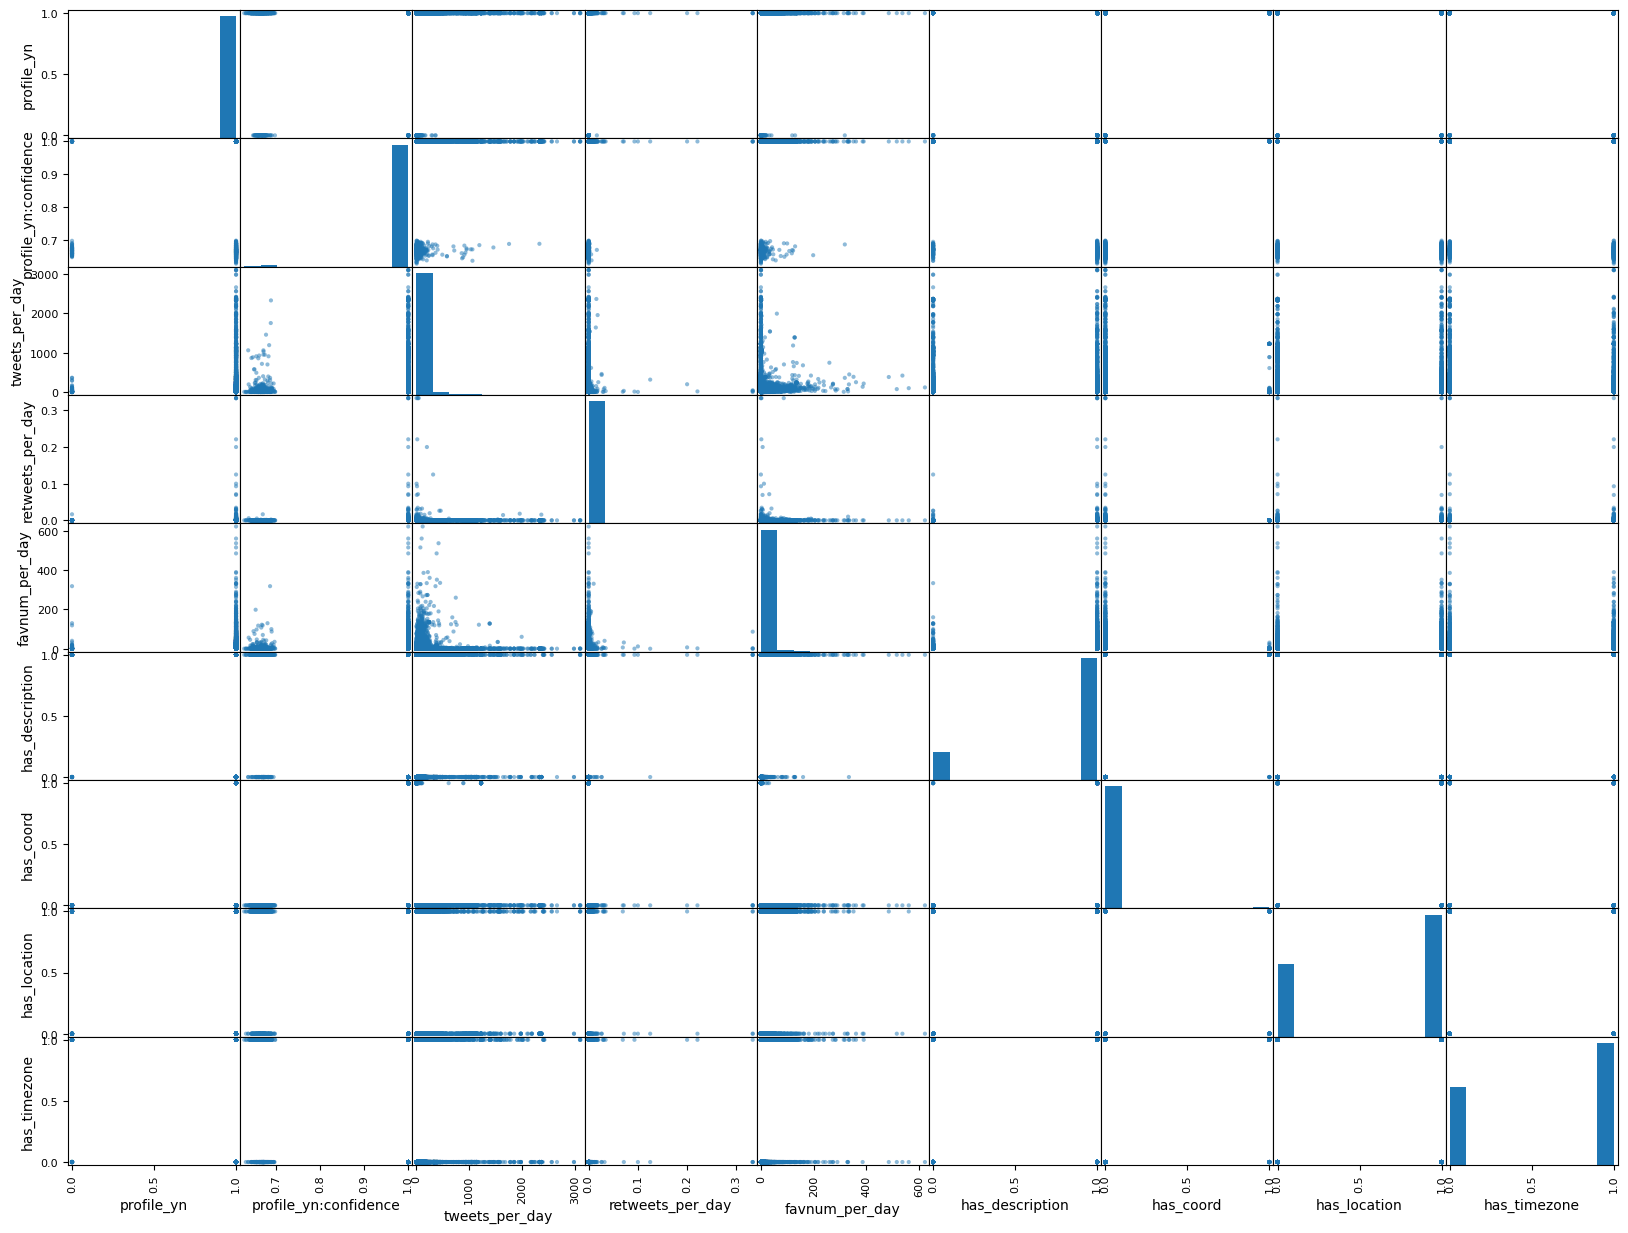

In [26]:
scatter_matrix(df1[['profile_yn', 'profile_yn:confidence', 'tweets_per_day', 'retweets_per_day', 'favnum_per_day', 'has_description', 'has_coord', 'has_location', 'has_timezone']], figsize=(20,15))

In [38]:
df2 = df[['tweets_per_day', 'retweets_per_day', 'favnum_per_day']]

In [123]:
def encode_gender(x):
    if x == 'female':
        return 0
    elif x == 'male':
        return 1
    elif x == 'brand':
        return 2
    else:
        return 3

In [127]:
suggest_label = df['gender'].apply(lambda x: encode_gender(x))
suggest_label

0        1
1        1
2        1
3        1
4        0
        ..
19995    1
19996    1
19997    0
19998    0
19999    2
Name: gender, Length: 20000, dtype: int64

## Feature Scaling

### Robust Scaler

In [94]:
rscaler = RobustScaler()
rs_data = rscaler.fit_transform(df2.values)

In [95]:
rs_df2 = pd.DataFrame(rs_data, index=df2.index, columns=df2.columns)
rs_df2.describe()

,tweets_per_day,retweets_per_day,favnum_per_day
count,20000.000000,20000.000000,20000.000000
mean,1.265320,0.000183,1.538819
std,4.690460,0.005435,5.820262
min,-0.269101,0.000000,-0.138705
25%,-0.202430,0.000000,-0.134148
50%,0.000000,0.000000,0.000000
75%,0.797570,0.000000,0.865852
max,67.379067,0.333333,173.889318


### Log Scaler

In [100]:
logs_df2 = df2.copy()

In [101]:
logs_df2['favnum_per_day'] = df2['favnum_per_day'].apply(lambda x: math.log1p(x))
logs_df2['tweets_per_day'] = df2['tweets_per_day'].apply(lambda x: math.log1p(x))

In [102]:
logs_df2.describe()

,tweets_per_day,retweets_per_day,favnum_per_day
count,20000.000000,20000.000000,20000.000000
mean,2.732036,0.000183,0.924693
std,1.667178,0.005435,1.149059
min,0.000551,0.000000,0.000000
25%,1.401825,0.000000,0.016160
50%,2.592242,0.000000,0.402769
75%,3.911824,0.000000,1.524305
max,8.041705,0.333333,6.434971


## KMeans

### Robust Scaler Scheme

In [103]:
km = KMeans(n_clusters=3)
km.fit(rs_df2)

/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [104]:
rs_df2['label'] = km.predict(rs_df2)
rs_df2.head()

,tweets_per_day,retweets_per_day,favnum_per_day,label
0,3.227373,0.000000,-0.138705,0
1,-0.124002,0.000000,-0.121740,0
2,0.098159,0.003003,6.324752,0
3,-0.253286,0.000000,-0.114448,0
4,0.954167,0.000000,18.498224,0


In [105]:
rs_df2_mean = rs_df2.groupby(['label']).agg('mean')
rs_df2_mean

,tweets_per_day,retweets_per_day,favnum_per_day
label,,,
0,0.643121,0.000166,0.999751
1,2.703685,0.001326,36.836083
2,28.475907,0.000123,0.057320


In [106]:
rs_df2['label'].value_counts()

label
0    19264
2      424
1      312
Name: count, dtype: int64

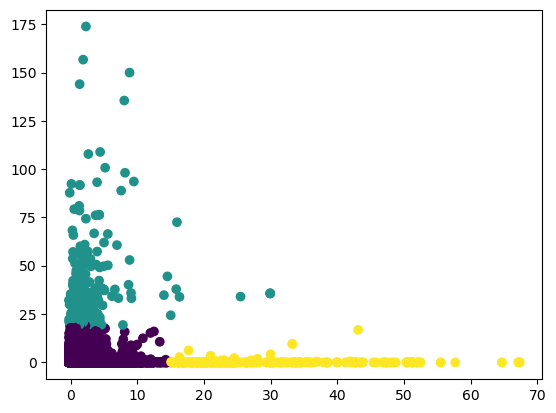

In [107]:
plt.scatter(x=rs_df2['tweets_per_day'], y=rs_df2['favnum_per_day'], c=rs_df2['label'])

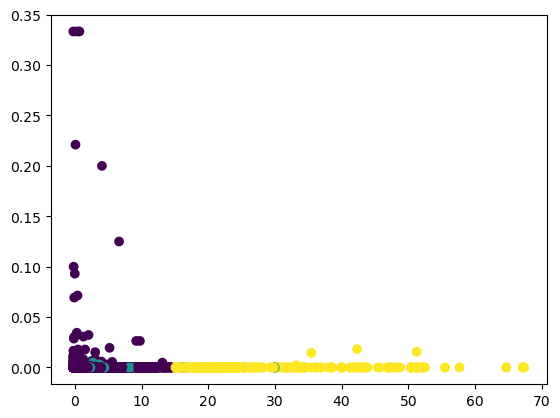

In [108]:
plt.scatter(x=rs_df2['tweets_per_day'], y=rs_df2['retweets_per_day'], c=rs_df2['label'])

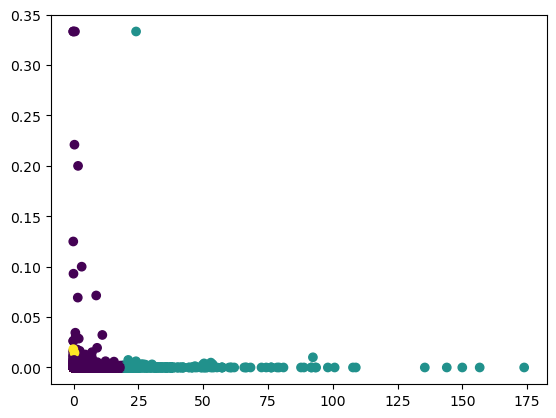

In [109]:
plt.scatter(x=rs_df2['favnum_per_day'], y=rs_df2['retweets_per_day'], c=rs_df2['label'])

In [63]:
cluster_range = range(1,10)
cluster_wss = []

/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/li

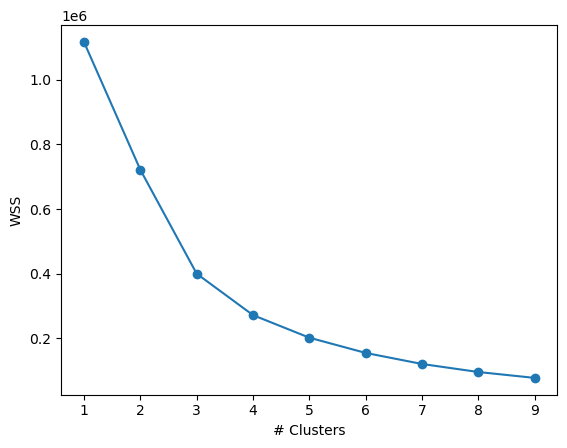

In [64]:
for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(rs_df2)
    cluster_wss.append(clusters.inertia_)
    
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker = 'o')
plt.show()

In [119]:
rs_df2.drop(['label'], axis=1, inplace=True)

### Log Scaler Scheme

/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hanhf/anaconda3/li

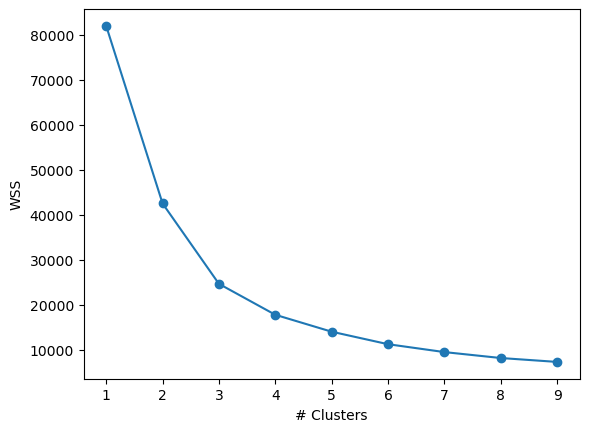

In [110]:
cluster_range = range(1,10)
cluster_wss = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(logs_df2)
    cluster_wss.append(clusters.inertia_)
    
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker = 'o')
plt.show()

In [111]:
km_logs = KMeans(n_clusters=3)
km_logs.fit(logs_df2)

/home/hanhf/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [112]:
logs_df2['label'] = km_logs.predict(logs_df2)
logs_df2.head()

,tweets_per_day,retweets_per_day,favnum_per_day,label
0,5.085029,0.000000,0.000000,2
1,2.036610,0.000000,0.058891,0
2,2.883004,0.003003,3.182673,1
3,0.546340,0.000000,0.083175,0
4,4.046242,0.000000,4.214189,1


In [114]:
logs_df2_mean = logs_df2.groupby(['label']).agg('mean')
logs_df2_mean

,tweets_per_day,retweets_per_day,favnum_per_day
label,,,
0,1.411219,0.000127,0.503617
1,3.375171,0.000311,2.657639
2,4.639772,0.000176,0.201810


In [113]:
logs_df2['label'].value_counts()

label
0    9993
2    5348
1    4659
Name: count, dtype: int64

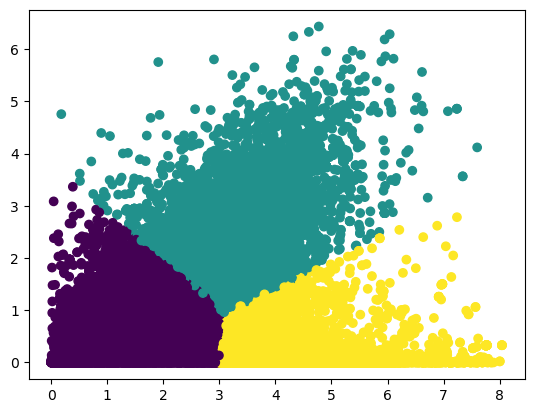

In [115]:
plt.scatter(x=logs_df2['tweets_per_day'], y=logs_df2['favnum_per_day'], c=logs_df2['label'])

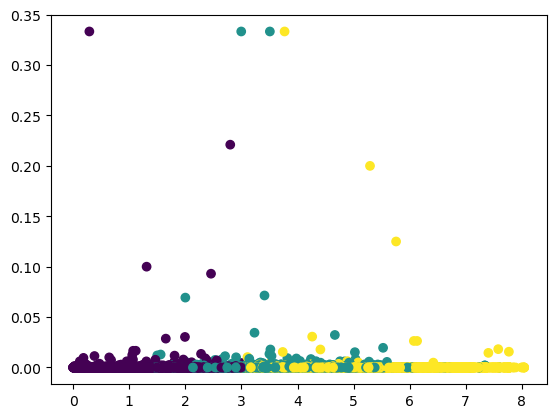

In [116]:
plt.scatter(x=logs_df2['tweets_per_day'], y=logs_df2['retweets_per_day'], c=logs_df2['label'])

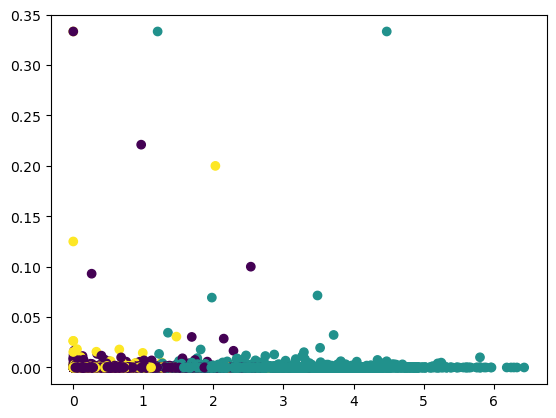

In [117]:
plt.scatter(x=logs_df2['favnum_per_day'], y=logs_df2['retweets_per_day'], c=logs_df2['label'])

In [130]:
logs_df2.drop(['label'], axis=1, inplace=True)

## SOM

In [131]:
som_logs_df2 = logs_df2.copy()

In [132]:
som_logs_df2['suggest_label'] = suggest_label

In [133]:
som_logs_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweets_per_day    20000 non-null  float64
 1   retweets_per_day  20000 non-null  float64
 2   favnum_per_day    20000 non-null  float64
 3   suggest_label     20000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 625.1 KB


In [135]:
som_logs_df2 = shuffle(som_logs_df2)

In [136]:
target = som_logs_df2['suggest_label']

In [137]:
X, X_tst, Y, Y_tst = train_test_split(som_logs_df2, target, test_size=.333, random_state=84)
X_trn, X_val, Y_trn, Y_val = train_test_split(X, Y, test_size=.5, random_state=84)

X_trn = X_trn.to_numpy()
X_tst = X_tst.to_numpy()
X_val = X_val.to_numpy()

In [138]:
from myminisom import MiniSom #see Moodle site for myminisom
#Create the SOM
som_shape = (100, 100) #define the size of the som
som = MiniSom(som_shape[0], som_shape[1], X_trn.shape[1], sigma=som_shape[0]/2, learning_rate=.9, neighborhood_function='gaussian', random_seed=84)
#initialize the SOM, then train it
epochs=40
som.pca_weights_init(X_trn)
som.train_random(X_trn, epochs * len(X_trn), verbose=True)
#Find the BMU for each sample
BMU_trn = np.array([som.winner(x) for x in X_trn])

BMU_class0 = BMU_trn[Y_trn==0]
BMU_class1 = BMU_trn[Y_trn==1]
BMU_class2 = BMU_trn[Y_trn==2]
BMU_class3 = BMU_trn[Y_trn==3]

 [ 266800 / 266800 ] 100% - 0:00:00 left 

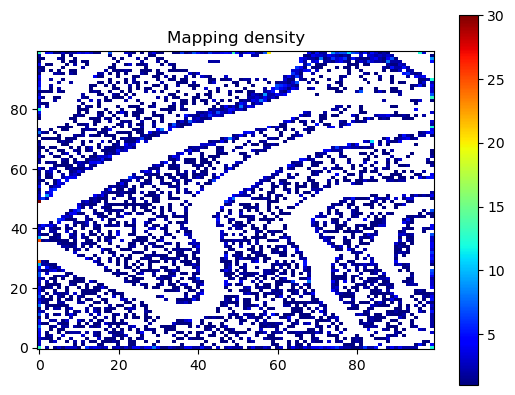

In [139]:
from copy import copy
densitymap = np.zeros(som_shape)
for row in range(0, BMU_trn.shape[0]):
    x, y = BMU_trn[row]
    densitymap[y, x] += 1
densitymap[densitymap == 0] = np.nan  # mark zero values with nan
my_cmap = copy(plt.cm.jet)
my_cmap.set_bad(color=(1, 1, 1))  # plot nan in white color
plt.imshow(densitymap, cmap=my_cmap, interpolation="none",
           origin="lower", aspect=0.75)
plt.colorbar()
plt.title('Mapping density')
plt.show()

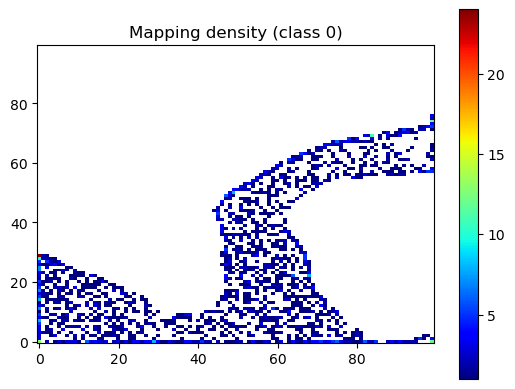

In [141]:
densitymap = np.zeros(som_shape)
for row in range(0, BMU_class0.shape[0]):
    x, y = BMU_class0[row]
    densitymap[y, x] += 1
densitymap[densitymap == 0] = np.nan  # mask zero values
plt.imshow(densitymap, cmap=my_cmap, interpolation="none",
           origin="lower", aspect=0.75)
plt.colorbar()
plt.title('Mapping density (class 0)')
plt.show()

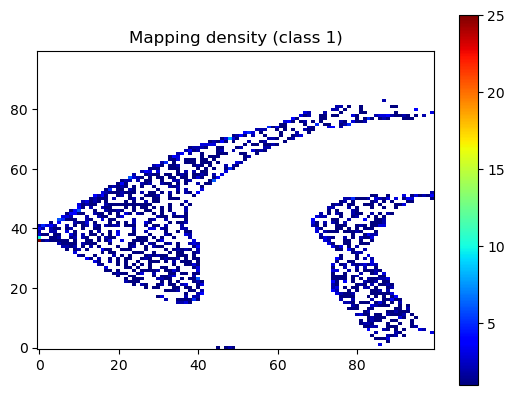

In [142]:
densitymap = np.zeros(som_shape)
for row in range(0, BMU_class1.shape[0]):
    x, y = BMU_class1[row]
    densitymap[y, x] += 1
densitymap[densitymap == 0] = np.nan  # mask zero values
plt.imshow(densitymap, cmap=my_cmap, interpolation="none",
           origin="lower", aspect=0.75)
plt.colorbar()
plt.title('Mapping density (class 1)')
plt.show()

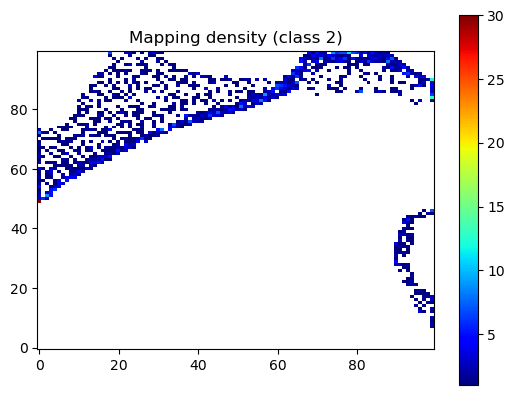

In [143]:
densitymap = np.zeros(som_shape)
for row in range(0, BMU_class2.shape[0]):
    x, y = BMU_class2[row]
    densitymap[y, x] += 1
densitymap[densitymap == 0] = np.nan  # mask zero values
plt.imshow(densitymap, cmap=my_cmap, interpolation="none",
           origin="lower", aspect=0.75)
plt.colorbar()
plt.title('Mapping density (class 2)')
plt.show()

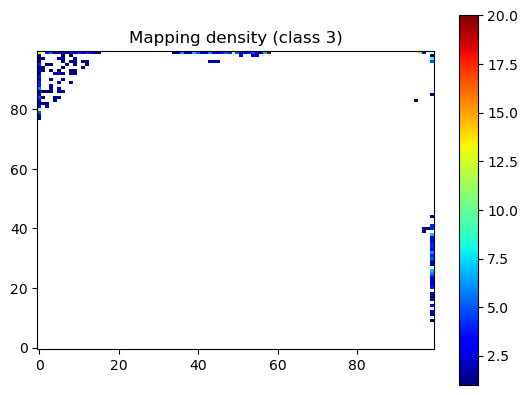

In [144]:
densitymap = np.zeros(som_shape)
for row in range(0, BMU_class3.shape[0]):
    x, y = BMU_class3[row]
    densitymap[y, x] += 1
densitymap[densitymap == 0] = np.nan  # mask zero values
plt.imshow(densitymap, cmap=my_cmap, interpolation="none",
           origin="lower", aspect=0.75)
plt.colorbar()
plt.title('Mapping density (class 3)')
plt.show()